## **SETUP**

In [1]:
# Download and import the required packages

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
!tar xf spark-2.4.8-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install kaggle

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [3]:
import findspark
findspark.init("spark-2.4.8-bin-hadoop2.7")
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
import pyspark
sc = spark.sparkContext

In [ ]:
# Remember to delete API keys !!!!
from google.colab import files
files.upload()

In [6]:
# Download the dataset using the Kaggle API

!mkdir -p ~/.kaggle 
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ashirwadsangwan/imdb-dataset
!unzip imdb-dataset.zip

 99% 1.43G/1.44G [00:11<00:00, 96.7MB/s]
100% 1.44G/1.44G [00:11<00:00, 134MB/s] 
Archive:  imdb-dataset.zip
  inflating: name.basics.tsv.gz      
  inflating: name.basics.tsv/name.basics.tsv  
  inflating: title.akas.tsv.gz       
  inflating: title.akas.tsv/title.akas.tsv  
  inflating: title.basics.tsv.gz     
  inflating: title.basics.tsv/title.basics.tsv  
  inflating: title.principals.tsv.gz  
  inflating: title.principals.tsv/title.principals.tsv  
  inflating: title.ratings.tsv.gz    
  inflating: title.ratings.tsv/title.ratings.tsv  


### **DATA**

In [7]:
# Principals data
principals = spark.read.csv("/content/title.principals.tsv/title.principals.tsv", sep=r'\t', header=True)
principals.createOrReplaceTempView("principals")
principals.show(n = 10)

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

In [8]:
# Title data
title = spark.read.csv("/content/title.basics.tsv/title.basics.tsv", sep=r'\t', header=True)
title.createOrReplaceTempView("title")
title.show(n = 10)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             4|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            \N|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [9]:
# People data
people = spark.read.csv("/content/name.basics.tsv/name.basics.tsv", sep=r'\t', header=True)
people.createOrReplaceTempView("people")
people.show(n = 10)

+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|soundtrack,actor,...|tt0050419,tt00531...|
|nm0000002|  Lauren Bacall|     1924|     2014|  actress,soundtrack|tt0071877,tt01170...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,soundtrac...|tt0054452,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,soun...|tt0077975,tt00725...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0069467,tt00509...|
|nm0000006| Ingrid Bergman|     1915|     1982|actress,soundtrac...|tt0038109,tt00368...|
|nm0000007|Humphrey Bogart|     1899|     1957|actor,soundtrack,...|tt0043265,tt00338...|
|nm0000008|  Marlon Brando|     1924|     2004|actor,soundtrack,...|tt0070849,tt00787...|
|nm0000009

In [10]:
# Rating data
ratings = spark.read.csv("/content/title.ratings.tsv/title.ratings.tsv", sep=r'\t', header=True)
ratings.createOrReplaceTempView("people")
ratings.show(n = 10)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
|tt0000006|          5.2|     102|
|tt0000007|          5.5|     615|
|tt0000008|          5.4|    1667|
|tt0000009|          5.4|      81|
|tt0000010|          6.9|    5545|
+---------+-------------+--------+
only showing top 10 rows



### **CLEANING AND PREPROCESSING**

In [11]:
# Selecting only the film at least mediocre that has at least 100 votes 
ratings_df = ratings.filter(ratings['averageRating'] > 4.4).filter(ratings['numVotes'] > 100)
ratings_df.createOrReplaceTempView('ratings_df')
ratings_df.show(n = 10)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1550|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1207|
|tt0000004|          6.2|     113|
|tt0000005|          6.1|    1934|
|tt0000006|          5.2|     102|
|tt0000007|          5.5|     615|
|tt0000008|          5.4|    1667|
|tt0000010|          6.9|    5545|
|tt0000011|          5.2|     236|
+---------+-------------+--------+
only showing top 10 rows



In [13]:
import time
q = 0
for i in range(10000):
  start = time.time()
  actors = principals.filter(principals['category'] == 'actor')
  q += (time.time() - start)
print(q)

24.36868691444397


In [14]:
q = 0
for i in range(10000):
  start = time.time()
  query = 'SELECT * from principals WHERE category = "actor" '
  actors_1 = spark.sql(query)
  q += (time.time() - start)
print(q)

21.36584782600403


In [15]:
query = 'SELECT * from principals WHERE category = "actor" '
actors_1 = spark.sql(query)
actors_1.createOrReplaceTempView('actors_1')

In [16]:
query = ''' 
            SELECT actors_1.tconst, actors_1.nconst 
             FROM ratings_df 
             INNER JOIN actors_1 ON ratings_df.tconst = actors_1.tconst 
             '''
good_film_actors = spark.sql(query)
good_film_actors.createOrReplaceTempView('good_film_actors')
good_film_actors.show()

+---------+---------+
|   tconst|   nconst|
+---------+---------+
|tt0000005|nm0443482|
|tt0000005|nm0653042|
|tt0000007|nm0179163|
|tt0000007|nm0183947|
|tt0000008|nm0653028|
|tt0000011|nm3692297|
|tt0000014|nm0166380|
|tt0000014|nm0244989|
|tt0000017|nm3691272|
|tt0000018|nm3692071|
|tt0000026|nm2350007|
|tt0000026|nm0525907|
|tt0000026|nm1151424|
|tt0000026|nm2354154|
|tt0000036|nm0420198|
|tt0000070|nm0525908|
|tt0000075|nm0617588|
|tt0000076|nm0420198|
|tt0000091|nm6170115|
|tt0000091|nm0617588|
+---------+---------+
only showing top 20 rows



In [17]:
query = '''SELECT * 
          FROM (SELECT nconst, count(tconst) as counter FROM good_film_actors GROUP BY nconst) 
          WHERE counter > 1'''
more_than_one = spark.sql(query)
more_than_one.createOrReplaceTempView('more_than_one')
more_than_one.show(n = 5)

+---------+-------+
|   nconst|counter|
+---------+-------+
|nm0709856|      7|
|nm0124236|      9|
|nm0706926|     11|
|nm0018091|      2|
|nm0564706|      2|
+---------+-------+
only showing top 5 rows



In [18]:
query = '''SELECT good_film_actors.nconst, good_film_actors.tconst 
          FROM more_than_one
          INNER JOIN good_film_actors ON good_film_actors.nconst = more_than_one.nconst'''
last_actors = spark.sql(query)
last_actors.createOrReplaceTempView('last_actors')
last_actors.show()

+---------+---------+
|   nconst|   tconst|
+---------+---------+
|nm0000086|tt0045293|
|nm0000086|tt0049877|
|nm0000086|tt0050260|
|nm0000086|tt0051989|
|nm0000086|tt0052276|
|nm0000086|tt0052686|
|nm0000086|tt0053370|
|nm0000086|tt0053749|
|nm0000086|tt0056290|
|nm0000086|tt0056906|
|nm0000086|tt0057051|
|nm0000086|tt0057414|
|nm0000086|tt0057422|
|nm0000086|tt0057967|
|nm0000086|tt0058089|
|nm0000086|tt0058135|
|nm0000086|tt0058704|
|nm0000086|tt0058986|
|nm0000086|tt0059168|
|nm0000086|tt0060400|
+---------+---------+
only showing top 20 rows



In [19]:
print(actors_1.count())
print(last_actors.count())

8493701
435265


### **EDA**

In [20]:
query = ' SELECT count(distinct tconst) FROM last_actors'
qr = spark.sql(query)
qr.show()

+----------------------+
|count(DISTINCT tconst)|
+----------------------+
|                171270|
+----------------------+



In [21]:
query = ' SELECT count(distinct nconst) FROM last_actors'
qr = spark.sql(query)
qr.show()

+----------------------+
|count(DISTINCT nconst)|
+----------------------+
|                 41827|
+----------------------+



In [22]:
query = ''' SELECT count(distinct tconst)/count(distinct nconst) as average 
          FROM last_actors'''
qr = spark.sql(query)
qr.show()

+-----------------+
|          average|
+-----------------+
|4.094723503956774|
+-----------------+



In [23]:
query = '''SELECT tconst, count(nconst)
          FROM last_actors
          GROUP BY tconst
          ORDER BY count(nconst) DESC'''
qr = spark.sql(query)
qr.show()

+---------+-------------+
|   tconst|count(nconst)|
+---------+-------------+
|tt2221405|           10|
|tt2205635|           10|
|tt2606492|           10|
|tt0191149|           10|
|tt3639836|           10|
|tt0877057|           10|
|tt0052506|           10|
|tt0051261|           10|
|tt0278228|           10|
|tt0441925|           10|
|tt4508902|           10|
|tt2359704|           10|
|tt0071036|           10|
|tt0388650|           10|
|tt0112538|           10|
|tt0262889|           10|
|tt0324485|           10|
|tt0061287|           10|
|tt0115097|           10|
|tt0497548|           10|
+---------+-------------+
only showing top 20 rows



### **FPGrowth**

In [24]:
from pyspark.sql.functions import collect_set
from pyspark.ml.fpm import FPGrowth


In [26]:
bask = last_actors.groupBy('tconst').agg(collect_set('nconst').alias('name_id'))
bask.createOrReplaceTempView('bask')
fpg = FPGrowth(itemsCol="name_id", minSupport=0.001)
model = fpg.fit(bask)

In [27]:
frequent = model.freqItemsets
frequent.createOrReplaceTempView("frequent")
frequent.show()

+--------------------+----+
|               items|freq|
+--------------------+----+
|         [nm0000305]| 856|
|         [nm0144657]| 720|
|         [nm0532235]| 659|
|         [nm0642145]| 516|
|         [nm0224007]| 501|
|         [nm0444786]| 442|
|         [nm0001293]| 439|
|[nm0001293, nm053...| 341|
|         [nm0299192]| 434|
|         [nm0915762]| 425|
|         [nm0001101]| 424|
|         [nm0001832]| 421|
|         [nm0001319]| 419|
|[nm0001319, nm091...| 307|
|         [nm0004770]| 416|
|         [nm0247040]| 400|
|         [nm0048389]| 393|
|         [nm0001288]| 385|
|         [nm0000741]| 382|
|         [nm0001455]| 376|
+--------------------+----+
only showing top 20 rows



In [28]:
associationRules = model.associationRules
associationRules.createOrReplaceTempView("associationRules")
associationRules.show()

+--------------------+-----------+------------------+------------------+
|          antecedent| consequent|        confidence|              lift|
+--------------------+-----------+------------------+------------------+
|[nm0004898, nm049...|[nm0000494]|0.9942857142857143| 901.0122448979592|
|         [nm0004310]|[nm0002935]|               1.0| 835.4634146341463|
|         [nm0552509]|[nm0001832]|0.9019607843137255| 366.9330725164175|
|         [nm0427489]|[nm0001083]|0.9955947136563876| 615.5794462380127|
|[nm0000996, nm000...|[nm0000408]|               1.0| 882.8350515463918|
|[nm2625816, nm064...|[nm0000563]|               1.0| 658.7307692307692|
|[nm0183417, nm000...|[nm0756114]|0.9948453608247423| 851.9358247422681|
|         [nm0005380]|[nm0004951]|0.8647540983606558| 617.1101434426229|
|         [nm0333410]|[nm0005194]|0.8695652173913043| 559.8888525661981|
|         [nm0333410]|[nm0005110]|0.8647342995169082|  423.151552795031|
|         [nm0813812]|[nm0913587]|0.934782608695652

In [30]:
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
asso = model.transform(bask)
asso.createOrReplaceTempView('asso')
query = 'SELECT * FROM asso WHERE size(prediction) > 0'
prediction = spark.sql(query)
prediction.show()

+---------+--------------------+--------------------+
|   tconst|             name_id|          prediction|
+---------+--------------------+--------------------+
|tt0040695|[nm0694090, nm000...|         [nm0394438]|
|tt0244000|[nm0268199, nm053...|         [nm1533927]|
|tt0302361|[nm0001305, nm000...|[nm0374865, nm143...|
|tt0380609|[nm0000321, nm033...|[nm0005194, nm000...|
|tt0720166|[nm0005194, nm000...|         [nm0005110]|
|tt0810922|[nm0283945, nm033...|[nm0005194, nm000...|
|tt1031969|[nm0933988, nm126...|         [nm1024677]|
|tt7001412|[nm1102140, nm729...|[nm0781981, nm000...|
|tt0079576|[nm0005019, nm049...|         [nm0341431]|
|tt0094919|[nm0342241, nm064...|         [nm0532235]|
|tt0187559|[nm0301959, nm000...|[nm0374865, nm143...|
|tt0416891|[nm0001505, nm000...|         [nm1131557]|
|tt1031378|[nm0552509, nm073...|         [nm0001832]|
|tt4274188|[nm0002023, nm000...|[nm0491402, nm000...|
|tt0108333|[nm0000662, nm000...|[nm0647638, nm262...|
|tt0108823|[nm0151419, nm014

In [34]:
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
asso = model.transform(bask)
asso.createOrReplaceTempView('asso')
query = 'SELECT name_id,prediction FROM asso WHERE size(prediction) = 1 AND size(name_id) = 4 LIMIT 2'
prediction = spark.sql(query)
prediction.show()

+--------------------+-----------+
|             name_id| prediction|
+--------------------+-----------+
|[nm0973177, nm113...|[nm0001505]|
|[nm0001459, nm000...|[nm0004951]|
+--------------------+-----------+



In [38]:
prediction.createOrReplaceTempView('prediction')
prediction.select('name_id').show(truncate=False)

+--------------------------------------------+
|name_id                                     |
+--------------------------------------------+
|[nm0973177, nm1131557, nm1519639, nm2868110]|
|[nm0001459, nm0000491, nm0005405, nm0005380]|
+--------------------------------------------+



In [48]:
people.filter(people['nconst'] == 'nm0001505').select('primaryName').show()

+------------+
| primaryName|
+------------+
|Joe Mantegna|
+------------+



In [47]:
x = ['nm0973177', 'nm1131557', 'nm1519639', 'nm2868110']
y = []
for i in x:
  ppl = people.filter(people['nconst'] == i).select('primaryName').show()


+------------+
| primaryName|
+------------+
|Kyle Gallner|
+------------+

+-------------------+
|        primaryName|
+-------------------+
|Matthew Gray Gubler|
+-------------------+

+-----------+
|primaryName|
+-----------+
|   Adam Nee|
+-----------+

+---------------+
|    primaryName|
+---------------+
|Hannibal Buress|
+---------------+



In [50]:
x = ['nm0001459', 'nm0000491', 'nm0005405', 'nm0005380']
y = []
for i in x:
  ppl = people.filter(people['nconst'] == i).select('primaryName').show()

+-----------+
|primaryName|
+-----------+
|Denis Leary|
+-----------+

+--------------+
|   primaryName|
+--------------+
|John Leguizamo|
+--------------+

+-------------------+
|        primaryName|
+-------------------+
|Seann William Scott|
+-------------------+

+-----------+
|primaryName|
+-----------+
| Ray Romano|
+-----------+



In [51]:
people.filter(people['nconst'] == 'nm0004951').select('primaryName').show()

+------------+
| primaryName|
+------------+
|Brad Garrett|
+------------+



In [40]:
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
asso = model.transform(bask)
asso.createOrReplaceTempView('asso')
query = 'SELECT * FROM asso WHERE size(prediction) = 1 AND size(name_id) = 3 LIMIT 2'
prediction = spark.sql(query)
prediction.show(truncate=False)

+---------+---------------------------------+-----------+
|tconst   |name_id                          |prediction |
+---------+---------------------------------+-----------+
|tt0244000|[nm0268199, nm0532683, nm0004790]|[nm1533927]|
|tt0079576|[nm0005019, nm0494432, nm0000165]|[nm0341431]|
+---------+---------------------------------+-----------+



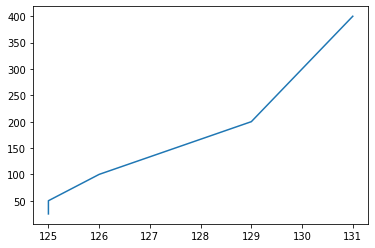

In [52]:
#Time for processing 25k, 50k, 100k, 200k and 400k 
#Time retrieved using an external notebook, limiting the query to 25k, 50k, 100k, 200k and 400k rows and timing 5 times the chunks of code required for the model (taking the median value)
from matplotlib import pyplot as plt
plt.plot([125,125,126,129,131],[25,50,100,200,400])